# Implementing a Convolutional Neural Network

**The Problem: MNIST digit classification** <br>
The MNIST database of handwritten digits, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image.
MNIST handwritten digit classification. It’s simple: given an image, classify it as a digit.

Sample images from the MNIST dataset
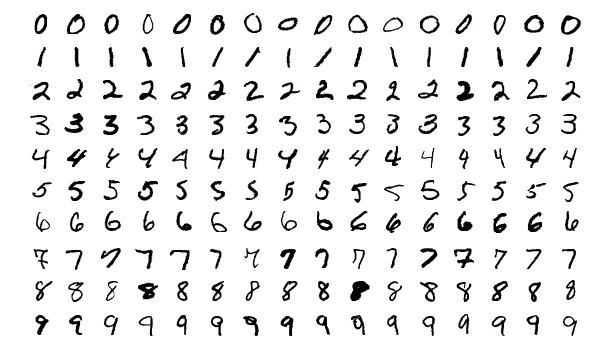
Each image in the MNIST dataset is 28x28 and contains a centered, grayscale digit. Our CNN will take an image and output one of 10 possible classes (one for each digit).

**1. Setup** <br>
Let’s first download some packages we’ll need:

In [2]:
!pip install mnist

Import these packages and poke around the MNIST dataset:

In [1]:
import numpy as np
import mnist
from tensorflow import keras

In [2]:
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [8]:
print('MNIST Dataset Shape:')
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))


MNIST Dataset Shape:
X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [9]:
# Normalize the images.
X_train = (X_train / 255) - 0.5
X_test = (X_test / 255) - 0.5
Y_train = (Y_train / 255) - 0.5
Y_test = (Y_test / 255) - 0.5

In [ ]:
# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

In [ ]:
# The first time you run this might be a bit slow, since the
# mnist package has to download and cache the data.
#train_images = mnist.train_images()
#train_labels = mnist.train_labels()

#print(train_imtrain_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()ages.shape) # (60000, 28, 28)
#print(train_labels.shape) # (60000,)

Preparing the Data

In [ ]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Reshape the images.
train_images = np.expand_dims(train_images, axis=3)
test_images = np.expand_dims(test_images, axis=3)

print(train_images.shape) # (60000, 28, 28, 1)
print(test_images.shape)  # (10000, 28, 28, 1)

The Sequential constructor takes an array of Keras Layers. We’ll use 3 types of layers for our CNN: Convolutional, Max Pooling, and Softmax.
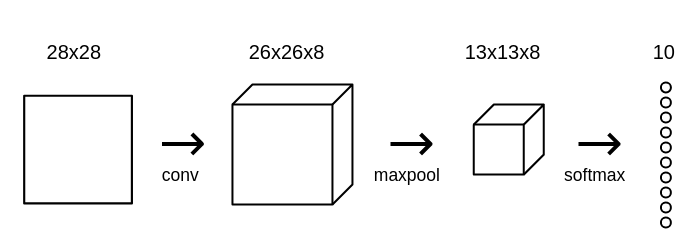

Building the Model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

num_filters = 8
filter_size = 3
pool_size = 2

model = Sequential([
  Conv2D(num_filters, filter_size, input_shape=(28, 28, 1)),
  MaxPooling2D(pool_size=pool_size),
  Flatten(),
  Dense(10, activation='softmax'),
])